**Analysis of a dataset from Kaggle involving victims of NYC motor vehicle accidents**

***Technologies Used: numpy, pandas, matplotlib.pylot, seaborn***

In [1]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 7

# Set the font size and color for the title using the rcParams dictionary
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.titlecolor"] = "green"
plt.rcParams["axes.titleweight"] = "bold"

***Read our data***

In [2]:
nyc_crash_df = pd.read_csv('../datasets/NYC_Motor_Vehicle_Collisions_to_Person.csv')

***View head of data for brief rundown of columns and values***

In [3]:
nyc_crash_df.head()

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,BODILY_INJURY,SAFETY_EQUIPMENT,PERSON_SEX,PERSON_TYPE,PED_LOCATION,CONTRIBUTING_FACTOR_2,...,COMPLAINT,EMOTIONAL_STATUS,VEHICLE_ID,PERSON_ID,CONTRIBUTING_FACTOR_1,POSITION_IN_VEHICLE,PED_ROLE,UNIQUE_ID,PED_ACTION,COLLISION_ID
0,2021-05-02,21:00,Killed,62.0,Head,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,...,Severe Bleeding,Apparent Death,NaN,f2f329b6-2dfc-4bd0-b751-2e4255f1ea06,Traffic Control Disregarded,NaN,Pedestrian,11791937,Crossing Against Signal,4412948
1,2021-05-21,0:00,Killed,24.0,Entire Body,Air Bag Deployed,M,Occupant,NaN,NaN,...,Internal,Apparent Death,19986231.0,e27e12a2-0485-4e22-b692-3f8a765d2582,NaN,Driver,Driver,11819198,NaN,4419608
2,2021-10-15,2:00,Killed,30.0,Head,None,M,Occupant,NaN,NaN,...,Internal,Apparent Death,20091024.0,1a6f5aa7-5125-4be2-8499-fe7977cb0d90,NaN,Driver,Driver,11998317,NaN,4467504
3,2021-04-17,13:00,Killed,71.0,Head,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,...,Internal,Unconscious,NaN,b950706b-00a4-485c-84c5-777208cc3cc9,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11745791,"Crossing, No Signal, or Crosswalk",4408062
4,2021-05-25,22:00,Killed,69.0,Entire Body,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,...,None Visible,Conscious,NaN,6504ea0a-c92d-444c-8127-284943be9aac,Unspecified,NaN,Pedestrian,11991283,"Crossing, No Signal, Marked Crosswalk",4420918


***View the columns object***

In [4]:
nyc_crash_df.columns

Index(['CRASH_DATE', 'CRASH_TIME', 'PERSON_INJURY', 'PERSON_AGE',
       'BODILY_INJURY', 'SAFETY_EQUIPMENT', 'PERSON_SEX', 'PERSON_TYPE',
       'PED_LOCATION', 'CONTRIBUTING_FACTOR_2', 'EJECTION', 'COMPLAINT',
       'EMOTIONAL_STATUS', 'VEHICLE_ID', 'PERSON_ID', 'CONTRIBUTING_FACTOR_1',
       'POSITION_IN_VEHICLE', 'PED_ROLE', 'UNIQUE_ID', 'PED_ACTION',
       'COLLISION_ID'],
      dtype='object')

***View first 15 data values for more comprehensive initial analysis of dataset***

In [5]:
nyc_crash_df.iloc[:15]

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,BODILY_INJURY,SAFETY_EQUIPMENT,PERSON_SEX,PERSON_TYPE,PED_LOCATION,CONTRIBUTING_FACTOR_2,...,COMPLAINT,EMOTIONAL_STATUS,VEHICLE_ID,PERSON_ID,CONTRIBUTING_FACTOR_1,POSITION_IN_VEHICLE,PED_ROLE,UNIQUE_ID,PED_ACTION,COLLISION_ID
0,2021-05-02,21:00,Killed,62.0,Head,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,...,Severe Bleeding,Apparent Death,NaN,f2f329b6-2dfc-4bd0-b751-2e4255f1ea06,Traffic Control Disregarded,NaN,Pedestrian,11791937,Crossing Against Signal,4412948
1,2021-05-21,0:00,Killed,24.0,Entire Body,Air Bag Deployed,M,Occupant,NaN,NaN,...,Internal,Apparent Death,19986231.0,e27e12a2-0485-4e22-b692-3f8a765d2582,NaN,Driver,Driver,11819198,NaN,4419608
2,2021-10-15,2:00,Killed,30.0,Head,None,M,Occupant,NaN,NaN,...,Internal,Apparent Death,20091024.0,1a6f5aa7-5125-4be2-8499-fe7977cb0d90,NaN,Driver,Driver,11998317,NaN,4467504
3,2021-04-17,13:00,Killed,71.0,Head,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,...,Internal,Unconscious,NaN,b950706b-00a4-485c-84c5-777208cc3cc9,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11745791,"Crossing, No Signal, or Crosswalk",4408062
4,2021-05-25,22:00,Killed,69.0,Entire Body,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,...,None Visible,Conscious,NaN,6504ea0a-c92d-444c-8127-284943be9aac,Unspecified,NaN,Pedestrian,11991283,"Crossing, No Signal, Marked Crosswalk",4420918
5,2021-04-08,23:00,Killed,43.0,Head,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Unspecified,...,Internal,Unconscious,NaN,5d4760cc-99d2-45af-b673-15777906fe18,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11784113,Other Actions in Roadway,4407069
6,2021-01-14,15:00,Killed,81.0,Entire Body,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,...,Complaint of Pain or Nausea,Apparent Death,NaN,8914628e-0494-4d6d-8d7d-d36abc5a5a73,Alcohol Involvement,NaN,Pedestrian,11589611,"Crossing, No Signal, or Crosswalk",4384065
7,2021-01-20,19:00,Killed,60.0,Chest,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,...,Internal,Apparent Death,NaN,2b94e71e-fc46-4648-ab4a-61ef283edbc8,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11558357,"Crossing, No Signal, or Crosswalk",4385848
8,2021-09-04,14:00,Killed,52.0,Entire Body,Unknown,M,Occupant,NaN,NaN,...,Internal,Unconscious,20083400.0,f1d8ec06-018d-430c-8aef-ebe60e47d2a7,NaN,Driver,Driver,11985005,NaN,4453643
9,2021-05-03,23:00,Killed,21.0,Head,Lap Belt & Harness,M,Occupant,NaN,NaN,...,Internal,Unconscious,19993860.0,64974d87-d02f-42b1-a60b-58248a3e38de,NaN,Driver,Driver,11832119,NaN,4413273


***Split the data between the genders to count how many men (M) and women (F) were involved in the car accidents, or undefined (U)***

In [6]:
nyc_crash_df.value_counts('PERSON_SEX')

PERSON_SEX
M    27573
F    18012
U       84
dtype: int64

***Quick bar plot visualization of gender makeup for dataset***

<AxesSubplot:xlabel='PERSON_SEX'>

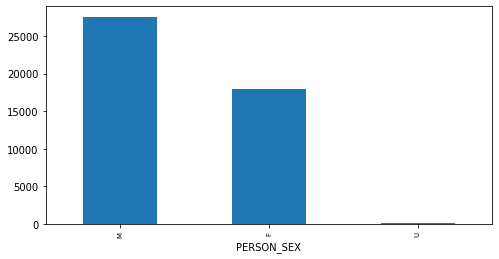

In [7]:
nyc_crash_df.value_counts('PERSON_SEX').plot(kind='bar')

***Sort by person's age from youngest, using a filtered off amount to eliminate negative values***

In [55]:
nyc_crash_df.sort_values('PERSON_AGE')[20:]

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,BODILY_INJURY,SAFETY_EQUIPMENT,PERSON_SEX,PERSON_TYPE,PED_LOCATION,CONTRIBUTING_FACTOR_2,...,COMPLAINT,EMOTIONAL_STATUS,VEHICLE_ID,PERSON_ID,CONTRIBUTING_FACTOR_1,POSITION_IN_VEHICLE,PED_ROLE,UNIQUE_ID,PED_ACTION,COLLISION_ID
33472,2021-02-04,9:00,Injured,0.0,Head,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Unspecified,...,Complaint of Pain or Nausea,Conscious,NaN,b34c655b-03ff-4384-b413-67a17a91bb43,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11574133,Crossing With Signal,4390239
17100,2021-10-27,23:00,Injured,0.0,Unknown,Unknown,F,Occupant,NaN,NaN,...,Unknown,Unknown,20101755.0,8167eeb4-c672-4bb1-ac16-52ffd8579c28,NaN,"Front passenger, if two or more persons, inclu...",Passenger,12017162,NaN,4475482
6489,2021-07-12,0:00,Injured,0.0,Back,Unknown,F,Occupant,NaN,NaN,...,Complaint of Pain or Nausea,Conscious,20015007.0,3e8dd1ca-6f4d-4c4b-a2c4-5db4d72abf5e,NaN,"Front passenger, if two or more persons, inclu...",Passenger,11867832,NaN,4435939
12169,2021-10-08,11:00,Injured,0.0,Unknown,Unknown,U,Occupant,NaN,NaN,...,Unknown,Unknown,20092043.0,9541b4da-7491-440e-b332-7ce867af6528,NaN,Unknown,Passenger,12000087,NaN,4470784
19221,2021-08-30,23:00,Injured,0.0,Head,Child Restraint Only,M,Occupant,NaN,NaN,...,None Visible,Conscious,20061529.0,96ac5a7b-4e11-4af0-a8dc-b72ff6e27dc1,NaN,"Middle rear seat, or passenger lying across a ...",Passenger,11947330,NaN,4456520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45102,2021-05-23,14:00,Injured,NaN,Unknown,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,...,Unknown,Unknown,NaN,a1531a04-4a1e-4293-bbd8-65c4357c6bf2,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11754630,"Crossing, No Signal, or Crosswalk",4419528
45125,2021-06-29,10:00,Injured,NaN,Back,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Unspecified,...,Complaint of Pain or Nausea,Conscious,NaN,ac121fef-a138-4a89-9601-ef2c748745ae,Unspecified,NaN,Pedestrian,11843031,Crossing With Signal,4432169
45262,2021-04-16,7:00,Injured,NaN,Shoulder - Upper Arm,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Unspecified,...,Complaint of Pain or Nausea,Conscious,NaN,2c9abdb1-ff7c-47f0-a359-44780f0c099b,Unspecified,NaN,Pedestrian,11813975,Does Not Apply,4409071
45351,2021-06-02,12:00,Injured,NaN,Elbow-Lower-Arm-Hand,Lap Belt & Harness,M,Occupant,NaN,NaN,...,Minor Bleeding,Conscious,20000377.0,b7e3e541-ba4c-48d7-8ba1-58053e49b133,NaN,Driver,Driver,11843131,NaN,4422912


***Histogram plot evaluation of the age makeup for the dataset***

<AxesSubplot:ylabel='Frequency'>

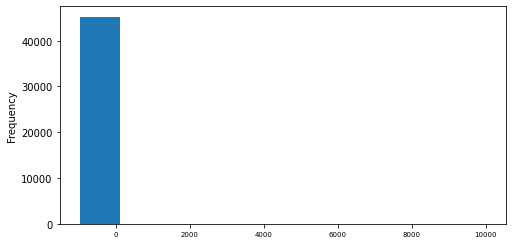

In [9]:
nyc_crash_df['PERSON_AGE'].plot(kind='hist')

***Using the groupby method on the dataset, we can find the average (mean) age of car accident victims filtered by their gender***

In [10]:
nyc_crash_df.groupby('PERSON_SEX')['PERSON_AGE'].mean().round(2)

PERSON_SEX
F    38.75
M    36.68
U    31.67
Name: PERSON_AGE, dtype: float64

***Using the groupby method on the dataset, we can filter out the average age of individual's who were either injured or killed. Interestingly, we can see here that the mean age of those killed was significantly higher than those who were injured. One can make a generalization here that this is due to the likelihood of older victims not surviving impact at the same degree of younger victims.***

***We then proceed to plot this out in the following cell***

In [11]:
nyc_crash_df.groupby('PERSON_INJURY')['PERSON_AGE'].mean().round(2)

PERSON_INJURY
Injured    37.44
Killed     46.31
Name: PERSON_AGE, dtype: float64

<AxesSubplot:xlabel='PERSON_INJURY'>

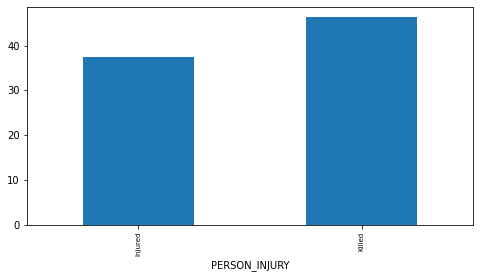

In [12]:
nyc_crash_df.groupby('PERSON_INJURY')['PERSON_AGE'].mean().round(2).plot(kind='bar')

***Here we identify all of the unique data values for the position in vehicle column***

In [13]:
for x in nyc_crash_df['POSITION_IN_VEHICLE'].unique():
    print(x)

nan
Driver
Front passenger, if two or more persons, including the driver, are in the front seat
Right rear passenger or motorcycle sidecar passenger
Riding/Hanging on Outside
Left rear passenger, or rear passenger on a bicycle, motorcycle, snowmobile
Middle rear seat, or passenger lying across a seat
Any person in the rear of a station wagon, pick-up truck, all passengers on a bus, etc
Middle front seat, or passenger lying across a seat
Unknown
If one person is seated on another person&apos;s lap


***Perhaps more informatively we can view each of these unique values and the amount they appear in the dataset***

***Here, we can see that the most common position in the vehicle was the "driver" position, followed by front, right rear, and left rear passengers***

***This is followed by a quick bar plot visualization for this data***

In [14]:
nyc_crash_df['POSITION_IN_VEHICLE'].value_counts()

Driver                                                                                    26053
Front passenger, if two or more persons, including the driver, are in the front seat       5403
Right rear passenger or motorcycle sidecar passenger                                       2798
Left rear passenger, or rear passenger on a bicycle, motorcycle, snowmobile                2491
Middle rear seat, or passenger lying across a seat                                          656
Unknown                                                                                     622
Riding/Hanging on Outside                                                                   527
Middle front seat, or passenger lying across a seat                                         440
Any person in the rear of a station wagon, pick-up truck, all passengers on a bus, etc      433
If one person is seated on another person&apos;s lap                                         25
Name: POSITION_IN_VEHICLE, dtype: int64

Text(0.5, 1.0, 'Unique Value Counts for Position in Vehicle')

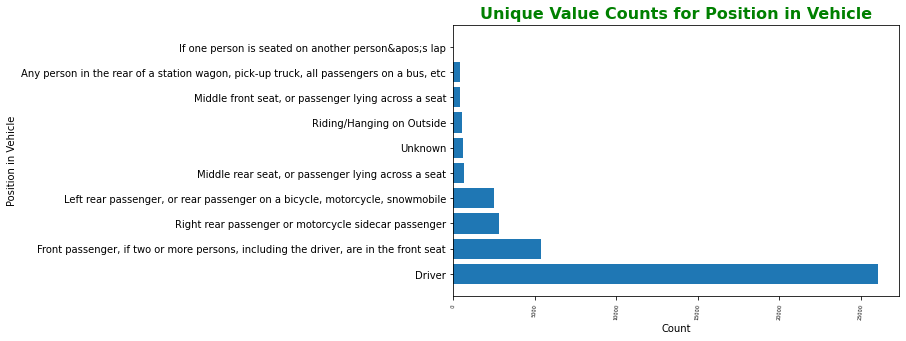

In [15]:
plt.figure(figsize=(8,5))

counts = nyc_crash_df['POSITION_IN_VEHICLE'].value_counts()

# Plot the bar data visual
plt.barh(counts.index, counts.values)

plt.xticks(rotation=85, fontsize=5)

# Add labels and title
plt.xlabel("Count")
plt.ylabel("Position in Vehicle")
plt.title("Unique Value Counts for Position in Vehicle")

***View unique values and then value counts of the "Emotional status" columns***

In [16]:
nyc_crash_df['EMOTIONAL_STATUS'].unique()

array(['Apparent Death', 'Unconscious', 'Conscious', 'Shock',
       'Semiconscious', 'Does Not Apply', 'Unknown', 'Incoherent'],
      dtype=object)

In [17]:
nyc_crash_df['EMOTIONAL_STATUS'].value_counts()

Conscious         42180
Shock              1244
Unknown            1186
Unconscious         306
Semiconscious       297
Incoherent          184
Apparent Death      168
Does Not Apply      104
Name: EMOTIONAL_STATUS, dtype: int64

***Here, we want to analyze the average age makeup when taking into consideration the emotional status of the individual, using the groupby method***

***We then proceed to plot the data on a barplot***

In [18]:
nyc_crash_df.groupby('EMOTIONAL_STATUS')['PERSON_AGE'].mean().round(0)

EMOTIONAL_STATUS
Apparent Death    44.0
Conscious         37.0
Does Not Apply    39.0
Incoherent        41.0
Semiconscious     37.0
Shock             38.0
Unconscious       39.0
Unknown           37.0
Name: PERSON_AGE, dtype: float64

Text(0.5, 1.0, 'Unique Value Counts for Emotional Status')

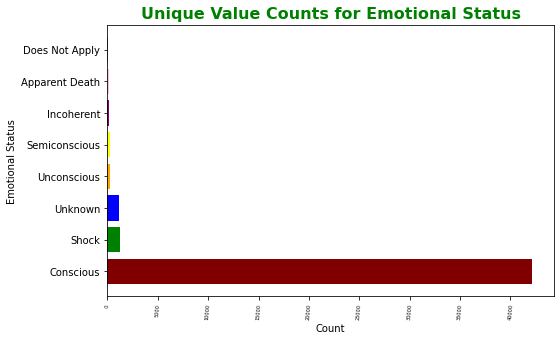

In [19]:
plt.figure(figsize=(8,5))

# Create a list of colors for the bars
colors = ["maroon", "green", "blue", "orange", "yellow", "purple", "pink", "gray", "black", "brown"]

counts = nyc_crash_df['EMOTIONAL_STATUS'].value_counts()

# Plot the bar data visual
plt.barh(counts.index, counts.values, color=colors)

plt.xticks(rotation=85, fontsize=5)

# Add labels and title
plt.xlabel("Count")
plt.ylabel("Emotional Status")
plt.title("Unique Value Counts for Emotional Status")

***We then explore the makeup of the complaint column, which describes complaints/injuries victims made during the motor vehicle accidents***

***We then use a barplot to plot this out***

In [20]:
nyc_crash_df['COMPLAINT'].value_counts()

Complaint of Pain or Nausea           27958
None Visible                           4870
Minor Bleeding                         2719
Contusion - Bruise                     2252
Whiplash                               1909
Unknown                                1708
Abrasion                               1674
Fracture - Distorted - Dislocation      883
Internal                                631
Concussion                              333
Severe Bleeding                         201
Severe Lacerations                      184
Crush Injuries                          182
Minor Burn                              120
Moderate Burn                            26
Amputation                                8
Severe Burn                               7
Paralysis                                 3
Does Not Apply                            1
Name: COMPLAINT, dtype: int64

Text(0.5, 1.0, 'Unique Value Counts for Complaints')

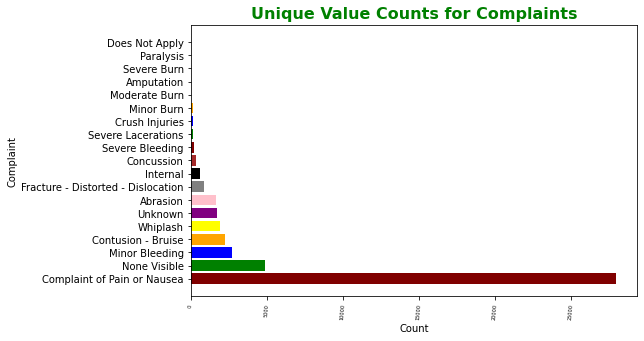

In [21]:
plt.figure(figsize=(8,5))

counts = nyc_crash_df['COMPLAINT'].value_counts()

# Plot the bar data visual
plt.barh(counts.index, counts.values, color=colors)

plt.xticks(rotation=85, fontsize=5)

# Add labels and title
plt.xlabel("Count")
plt.ylabel("Complaint")
plt.title("Unique Value Counts for Complaints")

***Here, we use the Seaborn technology to make this barplot concerning the average age of different complaints***

***Interestingly, we can note here that the average age of individuals suffering from "crush" injuries was significantly higher than other complaint types. One could assume this is due to the fact that senior individuals would likely have fraile bones and therefore be more suceptible to crush injuries***

<AxesSubplot:ylabel='PERSON_AGE'>

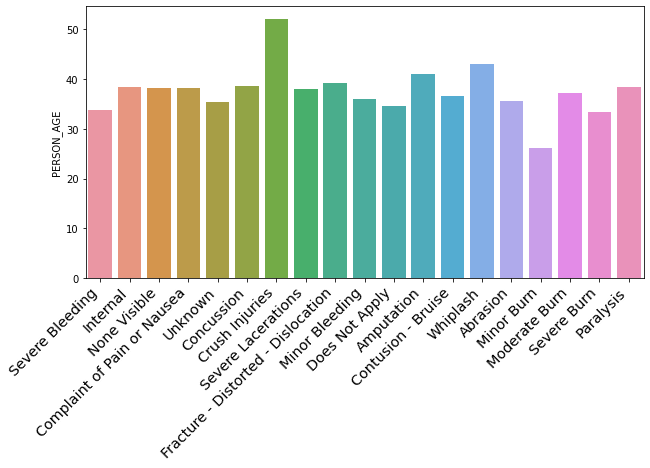

In [22]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x=nyc_crash_df['COMPLAINT'].unique(),data=nyc_crash_df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

sns.barplot(x=nyc_crash_df['COMPLAINT'].unique(), y=nyc_crash_df.groupby('COMPLAINT')['PERSON_AGE'].mean(), data=nyc_crash_df)

<AxesSubplot:ylabel='PERSON_AGE'>

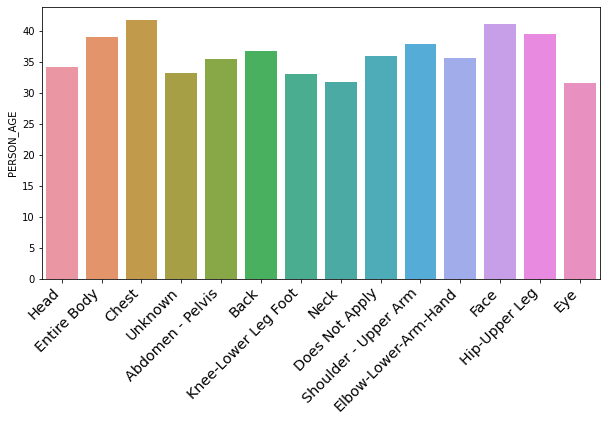

In [23]:
plt.figure(figsize=(10,5))
#chart = sns.countplot(x=nyc_crash_df['COMPLAINT'].unique(),data=nyc_crash_df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

sns.barplot(x=nyc_crash_df['BODILY_INJURY'].unique(), y=nyc_crash_df.groupby('BODILY_INJURY')['PERSON_AGE'].mean(), data=nyc_crash_df)

***Here is a barplot representation of the age distribution of the car crash victims***

Text(0.5, 1.0, 'Histogram of the Age of NYC Car Crash Victims')

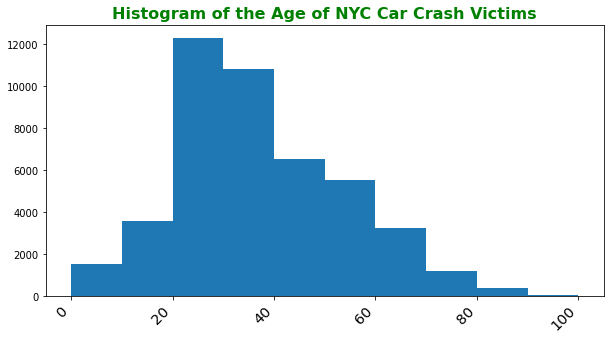

In [24]:
plt.figure(figsize=(10,5))
#chart = sns.countplot(x=nyc_crash_df['COMPLAINT'].unique(),data=nyc_crash_df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.hist(x=nyc_crash_df['PERSON_AGE'], range=(0, 100))
plt.title('Histogram of the Age of NYC Car Crash Victims')

***Analysis of the pedestrian action taken which occurred most frequently***

In [34]:
nyc_crash_df['PED_ACTION'].value_counts()

Crossing With Signal                               2481
Crossing, No Signal, or Crosswalk                  1162
Crossing, No Signal, Marked Crosswalk               528
Other Actions in Roadway                            514
Crossing Against Signal                             401
Not in Roadway                                      382
Unknown                                             271
Does Not Apply                                      269
Emerging from in Front of/Behind Parked Vehicle     212
Getting On/Off Vehicle Other Than School Bus        107
Working in Roadway                                   96
Riding/Walking Along Highway With Traffic            71
Playing in Roadway                                   30
Riding/Walking Along Highway Against Traffic         21
Pushing/Working on Car                               20
Going to/From Stopped School Bus                      6
Name: PED_ACTION, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Crossing With Signal'),
  Text(1, 0, 'Crossing, No Signal, or Crosswalk'),
  Text(2, 0, 'Crossing, No Signal, Marked Crosswalk'),
  Text(3, 0, 'Other Actions in Roadway'),
  Text(4, 0, 'Crossing Against Signal'),
  Text(5, 0, 'Not in Roadway'),
  Text(6, 0, 'Unknown'),
  Text(7, 0, 'Does Not Apply'),
  Text(8, 0, 'Emerging from in Front of/Behind Parked Vehicle'),
  Text(9, 0, 'Getting On/Off Vehicle Other Than School Bus'),
  Text(10, 0, 'Working in Roadway'),
  Text(11, 0, 'Riding/Walking Along Highway With Traffic'),
  Text(12, 0, 'Playing in Roadway'),
  Text(13, 0, 'Riding/Walking Along Highway Against Traffic'),
  Text(14, 0, 'Pushing/Working on Car'),
  Text(15, 0, 'Going to/From Stopped School Bus')])

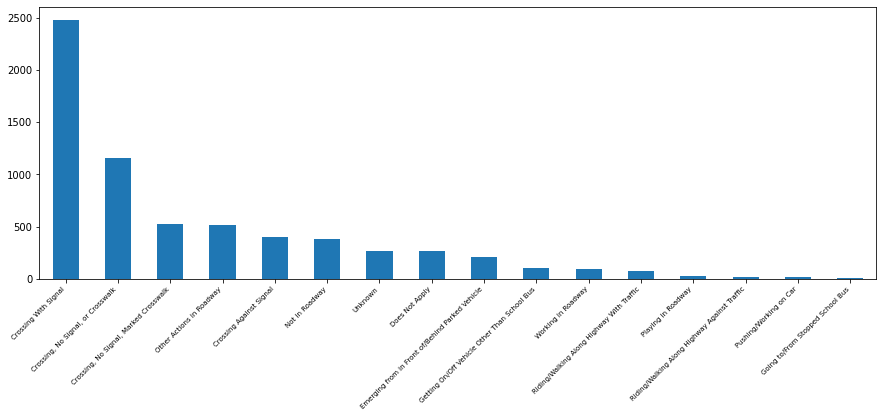

In [35]:
plt.figure(figsize=(15,5))
nyc_crash_df['PED_ACTION'].value_counts().plot(kind='bar')

plt.xticks(rotation=45, horizontalalignment='right')


***Here, we can see that the average age of pedestrians who illegally crossed against the signal was lower than the average age of the dataset

In [42]:
ped_illegal_cross = nyc_crash_df[nyc_crash_df['PED_ACTION'] == 'Crossing Against Signal']
ped_illegal_cross

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,BODILY_INJURY,SAFETY_EQUIPMENT,PERSON_SEX,PERSON_TYPE,PED_LOCATION,CONTRIBUTING_FACTOR_2,...,COMPLAINT,EMOTIONAL_STATUS,VEHICLE_ID,PERSON_ID,CONTRIBUTING_FACTOR_1,POSITION_IN_VEHICLE,PED_ROLE,UNIQUE_ID,PED_ACTION,COLLISION_ID
0,2021-05-02,21:00,Killed,62.0,Head,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,...,Severe Bleeding,Apparent Death,NaN,f2f329b6-2dfc-4bd0-b751-2e4255f1ea06,Traffic Control Disregarded,NaN,Pedestrian,11791937,Crossing Against Signal,4412948
21,2021-07-07,22:00,Killed,54.0,Head,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,...,Internal,Apparent Death,NaN,16abf5c7-a224-475f-811b-962b82d42a3e,Unspecified,NaN,Pedestrian,11865912,Crossing Against Signal,4435313
37,2021-03-22,22:00,Killed,61.0,Entire Body,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Traffic Control Disregarded,...,Internal,Unconscious,NaN,64f0b80d-3b9f-4a09-9f6e-0c26fd91ad2a,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11793164,Crossing Against Signal,4401009
41,2021-08-27,9:00,Killed,61.0,Back,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Unspecified,...,Complaint of Pain or Nausea,Conscious,NaN,51e0f743-b07c-4945-9e40-fcd4523d24fd,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11948636,Crossing Against Signal,4457151
58,2021-02-17,23:00,Killed,45.0,Head,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Unspecified,...,Internal,Unconscious,NaN,09d87ecc-a74f-44d4-84f0-b2f073273bd1,Unspecified,NaN,Pedestrian,11747196,Crossing Against Signal,4393789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44678,2021-06-06,23:00,Injured,52.0,Elbow-Lower-Arm-Hand,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,...,Minor Bleeding,Conscious,NaN,a00784d9-3374-4f15-b0c5-210e4a33965e,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11829286,Crossing Against Signal,4424292
44768,2021-06-13,18:00,Injured,54.0,Knee-Lower Leg Foot,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Unspecified,...,Complaint of Pain or Nausea,Conscious,NaN,434a3c1f-afa1-4718-b92a-f42de2bfc83f,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11850002,Crossing Against Signal,4426778
44893,2021-06-17,18:00,Injured,23.0,Back,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Traffic Control Disregarded,...,Abrasion,Conscious,NaN,291d5b01-72e8-4354-a344-ed9f642aaa21,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11765488,Crossing Against Signal,4429314
45012,2021-03-30,12:00,Injured,22.0,Entire Body,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Unspecified,...,Concussion,Conscious,NaN,9095f378-bac3-4de1-ad0d-68761b98cc35,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11777296,Crossing Against Signal,4403135


In [43]:
ped_legal_cross = nyc_crash_df.drop(nyc_crash_df[nyc_crash_df['PED_ACTION'] == 'Crossing Against Signal'].index)

In [44]:
ped_illegal_cross['PERSON_AGE'].mean()

36.113110539845756

In [45]:
ped_legal_cross['PERSON_AGE'].mean()

37.49956530462114

***Interestingly, there is no significant difference between the sex makeup for whether an individual crossed legally or not***

In [52]:
illegal_cross_gender = ped_illegal_cross['PERSON_SEX'].value_counts() / len(ped_illegal_cross) * 100
illegal_cross_gender

M    60.84788
F    39.15212
Name: PERSON_SEX, dtype: float64

In [53]:
legal_cross_gender = ped_legal_cross['PERSON_SEX'].value_counts() / len(ped_legal_cross) * 100
legal_cross_gender

M    60.371565
F    39.442874
U     0.185562
Name: PERSON_SEX, dtype: float64